# 2. Limpieza de datos

In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind, f_oneway, chi2_contingency, anderson, kstest, shapiro, poisson, expon
import scipy.stats as stats

In [649]:
df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [650]:
# Creación de dos variables para separar las variables númericas y las categóricas
variables_numericas = ['Age', 'StudyTimeWeekly', 'Absences']
df_numericas = df[variables_numericas]

variables_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
df_categoricas = df[variables_categoricas]

## **<u> Limpieza de valores missing </u>**

In [651]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [652]:
# Buscar valores nulos
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **<u> Limpieza de valores outlier </u>**

Método IQR

El método IQR es una técnica que permite detectar valores atípicos en un conjunto de datos. El IQR se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) y se calcula con la fórmula:

$ IQR = Q3 - Q1 $

Este rango representa la dispersión de la mitad central de los datos. Los valores atípicos se consideran aquellos puntos que se encuentran fuera del rango definido por:

$ Q1 - 1.5 * IQR $

$ Q3 + 1.5 * IQR $

Estos valores extremos pueden distorsionar los resultados del análisis, por lo que es fundamental identificarlos y tratarlos adecuadamente.

In [653]:
# Función para identificar outliers con el método del rango intercuartilico

def identificar_outliers(df, col_categorica, col_cuantitativa):
  outliers = pd.DataFrame() 
  
  for categoria in df[col_categorica].unique(): 
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa] 
    Q1 = data_categoria.quantile(0.25) 
    Q3 = data_categoria.quantile(0.75) 
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR 
    limite_superior = Q3 + 1.5 * IQR 
    outliers_categoria = data_categoria[(data_categoria < limite_inferior) | (data_categoria > limite_superior)] 
    outliers = pd.concat([outliers, outliers_categoria]) 
  return outliers 

# Identificar outliers en la variable 'Absences'
outliers = identificar_outliers(df, 'GradeClass', 'Absences') 
print(f"Outliers identificados:\n{outliers}")

Outliers identificados:
      Absences
2182      25.0
2192      28.0
2225      23.0
2226      28.0
2247      25.0
...        ...
2294      28.0
2299      24.0
2309      21.0
2337      22.0
2375      24.0

[73 rows x 1 columns]


In [654]:
indices_outliers = outliers.index
df_limpio = df.drop(indices_outliers)

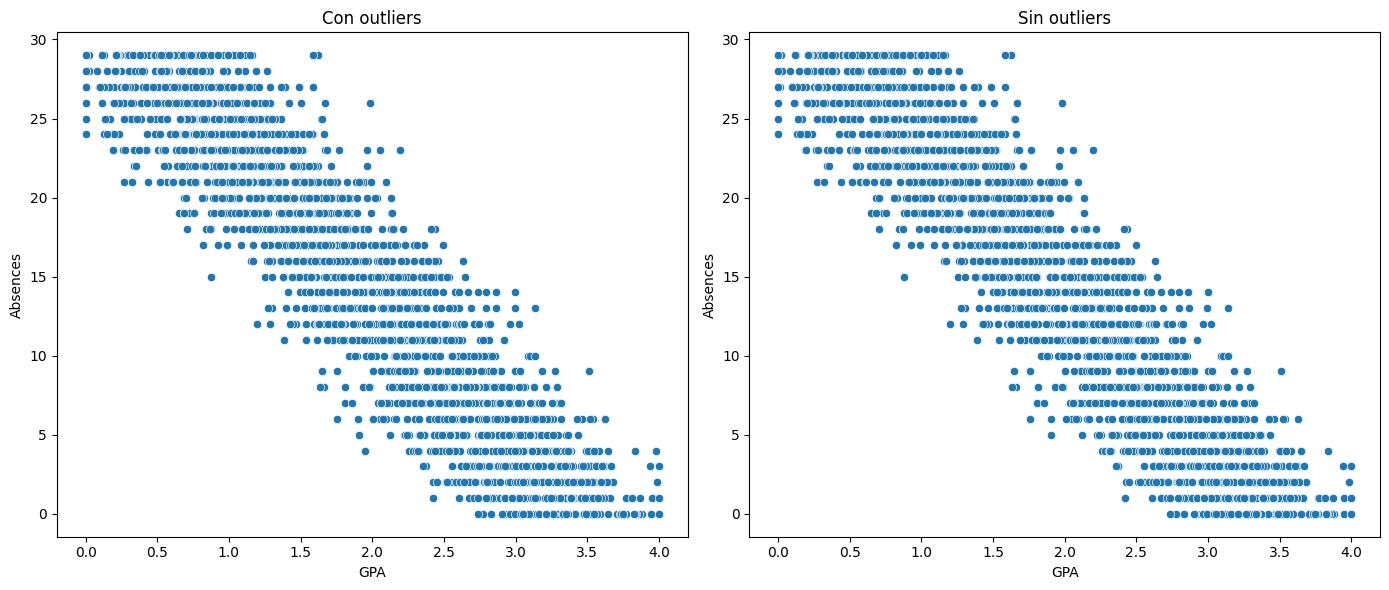

In [655]:
# Comparación de los datos antes y después de eliminar los valores outlier
plt.figure(figsize=(14, 6))

# Antes de eliminar outliers
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='GPA', y='Absences')
plt.title('Con outliers')
plt.xlabel('GPA')
plt.ylabel('Absences')

# Después de eliminar outliers
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_limpio, x='GPA', y='Absences')
plt.title('Sin outliers')
plt.xlabel('GPA')
plt.ylabel('Absences')

plt.tight_layout()
plt.show()

### **<u> Correlación con GPA </u>**

In [656]:
df = df_limpio

In [657]:
# Spearman para GPA con variables numéricas

df_numericas_limpio = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

spearman_results = {}
for column in df_numericas_limpio.columns.drop('GPA'):
    corr, p_value = spearmanr(df_numericas_limpio[column], df_numericas_limpio['GPA']) # Calcular la correlación de Spearman y el valor p
    
    spearman_results[column] = (corr, p_value) # Almacenar los resultados en el diccionario

print("Resultados de la correlación de Spearman para 'GPA':\n")
for column, (corr, p_value) in spearman_results.items():
    print(f"Variable: {column}")
    print(f"Correlación Spearman: {corr}")
    print(f"p_value: {p_value}\n")

Resultados de la correlación de Spearman para 'GPA':

Variable: Age
Correlación Spearman: 0.001552747172061791
p_value: 0.9404265005723138

Variable: StudyTimeWeekly
Correlación Spearman: 0.17176366215657607
p_value: 8.155431623192861e-17

Variable: Absences
Correlación Spearman: -0.9245678768588965
p_value: 0.0



In [658]:
# t de Student para GPA con variables categoricas dicotómicas

# Variables dicotómicas
dicotomicas = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Resultados de la prueba t
t_test_results = {}
for var in dicotomicas:
    # Dividir los datos en dos grupos según la variable categórica
    group1 = df[df[var] == 0]['GPA']
    group2 = df[df[var] == 1]['GPA']
    
    # Realizar la prueba t de Student
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # equal_var=False para usar la corrección de Welch
    t_test_results[var] = (t_stat, p_value)

print("Resultados de t de Student para 'GPA':\n")
for var, (t_stat, p_value) in t_test_results.items():
    print(f"Variable: {var}")
    print(f"t_stat: {t_stat}")
    print(f"p_value: {p_value}\n")

Resultados de t de Student para 'GPA':

Variable: Gender
t_stat: 0.6511327384451334
p_value: 0.5150255288446948

Variable: Tutoring
t_stat: -6.9285307885802645
p_value: 6.630221861582827e-12

Variable: Extracurricular
t_stat: -4.463963714618275
p_value: 8.523728567296433e-06

Variable: Sports
t_stat: -2.6666389639426034
p_value: 0.007752193754898229

Variable: Music
t_stat: -3.303314367450223
p_value: 0.0010045235349168925

Variable: Volunteering
t_stat: -0.08518730603057142
p_value: 0.9321456539600483



In [659]:
# ANOVA para GPA con variables categoricas politómicas

# Variables politómicas
politomicas = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']

# Resultados de ANOVA
anova_results = {}
for var in politomicas:
    # Agrupar los datos por la variable categórica y obtener listas de GPA para cada grupo
    grouped = [group['GPA'].values for name, group in df.groupby(var)]
    
    # Realizar la prueba ANOVA
    f_stat, p_value = f_oneway(*grouped)
    anova_results[var] = (f_stat, p_value)

print("Resultados de ANOVA para 'GPA':\n")
for var, (f_stat, p_value) in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {f_stat}")
    print(f"p_value: {p_value}\n")

Resultados de ANOVA para 'GPA':

Variable: Ethnicity
f_stat: 0.8957750714695426
p_value: 0.4425525399854753

Variable: ParentalEducation
f_stat: 2.148025508346986
p_value: 0.07250216986129734

Variable: ParentalSupport
f_stat: 22.635020644757425
p_value: 2.3086141626953513e-18



### **<u> Correlación con GradeClass </u>**

In [660]:
# ANOVA para cada variable numérica respecto a 'GradeClass'
anova_results = {}
for var in variables_numericas:
    if var != 'GradeClass':
        groups = [df[df['GradeClass'] == grade][var] for grade in df['GradeClass'].unique()]
        anova_results[var] = stats.f_oneway(*groups)

print("Resultados de ANOVA para 'GradeClass':\n")
for var, result in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {result.statistic}")
    print(f"p_value: {result.pvalue}\n")

Resultados de ANOVA para 'GradeClass':

Variable: Age
f_stat: 0.25386973022098386
p_value: 0.9074068799624534

Variable: StudyTimeWeekly
f_stat: 11.684924956841773
p_value: 2.139308775473198e-09

Variable: Absences
f_stat: 1426.0304890248913
p_value: 0.0



In [661]:
# La prueba de independencia Chi-cuadrado evalua si hay una asociacion significativa entre dos variables categoricas

# Chi-cuadrado para cada variable categórica respecto a 'GradeClass'
chi2_results = {}
for var in variables_categoricas:
    contingency_table = pd.crosstab(df_categoricas[var], df['GradeClass'])
    chi2_results[var] = chi2_contingency(contingency_table)

# Mostrar resultados de Chi-cuadrado
print("Resultados de Chi-cuadrado para 'GradeClass':\n")
for var, result in chi2_results.items():
    chi2, p, dof, ex = result
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}")
    print(f"p_value: {p}\n")

Resultados de Chi-cuadrado para 'GradeClass':

Variable: Gender
Chi2: 1.107128457717993
p_value: 0.8931395536351493

Variable: Ethnicity
Chi2: 9.49829543489341
p_value: 0.6598825139506861

Variable: ParentalEducation
Chi2: 13.576752955414591
p_value: 0.6302122212579611

Variable: Tutoring
Chi2: 39.921016870475896
p_value: 4.49431122709063e-08

Variable: ParentalSupport
Chi2: 68.11090696891978
p_value: 2.1326125111472168e-08

Variable: Extracurricular
Chi2: 16.17246549598481
p_value: 0.002796260291025709

Variable: Sports
Chi2: 7.334869930609791
p_value: 0.11921516581096253

Variable: Music
Chi2: 7.219857392534656
p_value: 0.12471597755390729

Variable: Volunteering
Chi2: 1.8103364117872318
p_value: 0.7705907086499205



#### **<u> Resultados para 'GPA' </u>**

**Resumen de la correlación de Spearman**
* Significativo: StudyTimeWeekly, Absences
* No significativo:  Age

**Resumen de la t de Student**
* Significativo (p < 0.05): Tutoring, Extracurricular, Sports, Music
* No significativo (p ≥ 0.05): Gender, Volunteering

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): ParentalSupport
* No significativo (p ≥ 0.05): Ethnicity, ParentalEducation

**Resultado**
* Número de variables independientes con relación significativa con 'GPA': 7
* StudyTimeWeekly, Absences, Tutoring, Extracurricular, Sports, Music, ParentalSupport

#### **<u> Resultados para 'GradeClass' </u>**

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): StudyTimeWeekly, Absences
* No significativo (p ≥ 0.05): Age

**Resumen de la prueba chi-cuadrado**
* Significativo (p < 0.05): Tutoring, ParentalSupport, Extracurricular
* No significativo (p ≥ 0.05): Gender, Ethnicity, ParentalEducation, Sports, Music, Volunteering

**Resultado**
* Número de variables independientes con relación significativa con 'GradeClass': 5
* StudyTimeWeekly, Absences, Tutoring, Extracurricular, ParentalSupport

## **<u> Elección de la variable objetivo </u>**

Dado que hay más variables independientes con una relación significativa con la variable objetivo 'GPA' en comparación con 'GradeClass', se optará por usar 'GPA' para el análisis de datos y la construcción de modelos de Machine Learning. Esto de debe a que se espera que los modelos basados en 'GPA' proporcionen resultados más significativos y útiles.

## Tipo de distribución

hacer el test de wil-cox para saber la distribucion de los datos, con todas las variables

Shapiro-Wilk - kolmogorov-smirnov -> son test para evaluar la normalidad de los datos (con scipy)

1. Prueba de normalidad

In [662]:
# Test de Shapiro-Wilk para distribucion normal (si p < 0.05 indica que la distribución NO es normal)

variables_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

def test_shapiro_wilk(df, col_categorica, col_cuantitativa):
    resultados = {}
    for categoria in df[col_categorica].unique():
        data_categoria = df[df[col_categorica] == categoria][col_cuantitativa]
        stat, p_value = shapiro(data_categoria)
        resultados[categoria] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}

    return pd.DataFrame(resultados).T


resultados_prueba = {}
for col_categorica in variables_categoricas:
    resultados_prueba[col_categorica] = test_shapiro_wilk(df, col_categorica, 'GPA')

for col_categorica, resultado in resultados_prueba.items():
    print(f"Resultados del test de Shapiro-Wilk para '{col_categorica}' vs 'GPA':")
    print(resultado)
    print("\n")

Resultados del test de Shapiro-Wilk para 'Gender' vs 'GPA':
   Shapiro-Wilk Statistic       p-value
1                0.985115  1.159743e-09
0                0.981611  8.799381e-11


Resultados del test de Shapiro-Wilk para 'Ethnicity' vs 'GPA':
   Shapiro-Wilk Statistic       p-value
0                0.981250  3.743799e-11
2                0.984917  1.217478e-04
1                0.983726  3.288821e-05
3                0.983830  1.360125e-02


Resultados del test de Shapiro-Wilk para 'ParentalEducation' vs 'GPA':
   Shapiro-Wilk Statistic       p-value
2                0.981133  2.007429e-09
1                0.985287  1.653539e-06
3                0.976959  1.749233e-05
4                0.990539  5.832900e-01
0                0.979667  1.916956e-03


Resultados del test de Shapiro-Wilk para 'Tutoring' vs 'GPA':
   Shapiro-Wilk Statistic       p-value
1                0.982178  1.656817e-07
0                0.980832  6.731553e-14


Resultados del test de Shapiro-Wilk para 'ParentalSuppor

In [663]:
# Test de Kolmogorov-Smirnov (si p < 0.05 implica que la distribución NO es normal)

variables_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

def test_ks(df, col_categorica, col_cuantitativa):
    resultados = {}
    for categoria in df[col_categorica].unique():
        data_categoria = df[df[col_categorica] == categoria][col_cuantitativa]
        stat, p_value = kstest(data_categoria, 'norm', args=(data_categoria.mean(), data_categoria.std()))
        resultados[categoria] = {'KS Statistic': stat, 'p-value': p_value}

    return pd.DataFrame(resultados).T

# Ejecución de la prueba para cada variable categórica y la variable cuantitativa 'GPA'
resultados_prueba = {}
for col_categorica in variables_categoricas:
    resultados_prueba[col_categorica] = test_ks(df, col_categorica, 'GPA')

# Imprimir los resultados
for col_categorica, resultado in resultados_prueba.items():
    print(f"Resultados de la prueba de Kolmogorov-Smirnov para '{col_categorica}' vs 'GPA':")
    print(resultado)
    print("\n")

Resultados de la prueba de Kolmogorov-Smirnov para 'Gender' vs 'GPA':
   KS Statistic   p-value
1      0.039320  0.049583
0      0.049822  0.007000


Resultados de la prueba de Kolmogorov-Smirnov para 'Ethnicity' vs 'GPA':
   KS Statistic   p-value
0      0.047018  0.011015
2      0.034304  0.649111
1      0.045110  0.274434
3      0.063166  0.335174


Resultados de la prueba de Kolmogorov-Smirnov para 'ParentalEducation' vs 'GPA':
   KS Statistic   p-value
2      0.050073  0.020652
1      0.041167  0.180039
3      0.053602  0.246190
4      0.059596  0.764728
0      0.062967  0.298919


Resultados de la prueba de Kolmogorov-Smirnov para 'Tutoring' vs 'GPA':
   KS Statistic   p-value
1      0.050708  0.053333
0      0.047613  0.001242


Resultados de la prueba de Kolmogorov-Smirnov para 'ParentalSupport' vs 'GPA':
   KS Statistic   p-value
2      0.047832  0.073782
1      0.052063  0.143840
3      0.041120  0.198292
4      0.049324  0.570431
0      0.075440  0.184187


Resultados de la 

### Funciones tipo

In [664]:
# Test de Shapiro-Wilk (si p < 0.05 implica que la distribución no es normal)
def test_shapiro_wilk(df, col_categorica, col_cuantitativa):
  resultados = {}
  for categoria in df[col_categorica].unique():
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa]
    stat, p_value = stats.shapiro(data_categoria)
    resultados[categoria] = {'Shapiro-Wilk Statistic': stat, 'p-value': p_value}
    
  return pd.DataFrame(resultados).T

In [665]:
# Test de Kolmogorov-Smirnov (si p < 0.05 implica que la distribución no es normal)
def test_ks(df, col_categorica, col_cuantitativa):
  resultados = {}
  for categoria in df[col_categorica].unique():
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa]
    stat, p_value = stats.kstest(data_categoria, 'norm', args=(data_categoria.mean(), data_categoria.std()))
    resultados[categoria] = {'KS Statistic': stat, 'p-value': p_value}
    
  return pd.DataFrame(resultados).T

In [671]:
# Prueba Anderson-Darling para t de Student (si valor estadistico > valores criticos implica que NO es t de Student)

resultados_anderson = {}

for variable in variables_numericas:
    data_variable = df[variable]
    result = anderson(data_variable)
    resultados_anderson[variable] = {
        "Valor estadístico": result.statistic,
        "Valores críticos": result.critical_values
    }

# Convertir los resultados en un DataFrame para facilitar la visualización
df_resultados_anderson = pd.DataFrame(list(resultados_anderson.values()), columns=["Valor estadístico", "Valores críticos"])
df_resultados_anderson["Variable"] = resultados_anderson.keys()

print(df_resultados_anderson)

   Valor estadístico                    Valores críticos         Variable
0         118.455292  [0.575, 0.655, 0.786, 0.916, 1.09]              Age
1          21.402016  [0.575, 0.655, 0.786, 0.916, 1.09]  StudyTimeWeekly
2          25.070810  [0.575, 0.655, 0.786, 0.916, 1.09]         Absences


In [676]:
from scipy.stats import poisson

# Ejemplo para una columna numérica, reemplaza 'column_name' por el nombre real de tu columna
data = df['GPA']
lambda_ = data.mean()  # Lambda es la media esperada de la distribución de Poisson

# Verifica si los datos siguen una distribución de Poisson comparando la media y la varianza
if abs(lambda_ - data.mean()) < 1 and abs(lambda_**2 - data.var()) < 1:
    print("Los datos pueden seguir una distribución de Poisson.")
else:
    print("Los datos no parecen seguir una distribución de Poisson.")

Los datos no parecen seguir una distribución de Poisson.


In [670]:
import numpy as np
from scipy.stats import shapiro

datos = df['GPA']

# Realizar la prueba de Shapiro-Wilk
w, p = shapiro(datos)

# Interpretar los resultados
if p >= 0.05:
    print("No hay suficiente evidencia para rechazar la hipótesis de que los datos siguen una distribución normal.")
else:
    print("Hay suficiente evidencia para rechazar la hipótesis de que los datos siguen una distribución normal.")


Hay suficiente evidencia para rechazar la hipótesis de que los datos siguen una distribución normal.


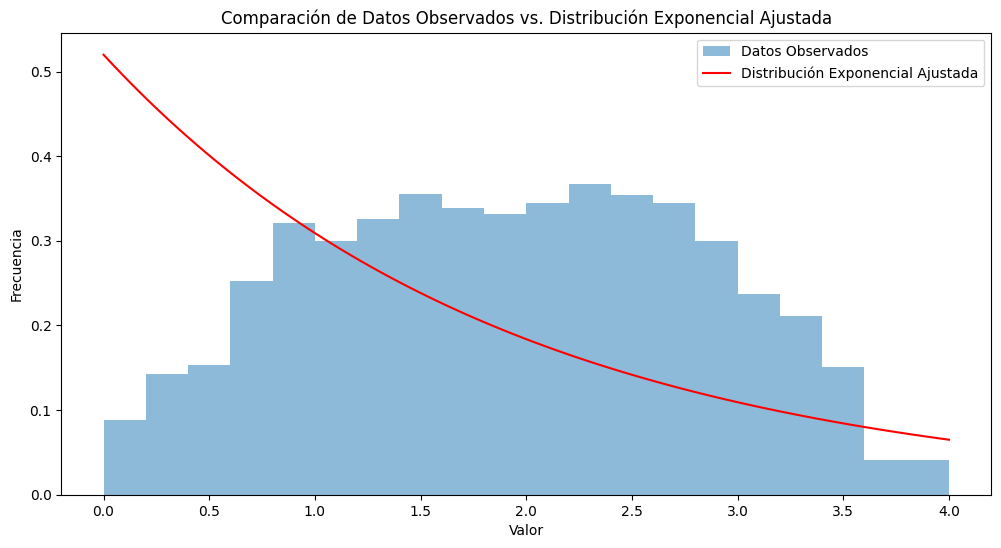

In [683]:

# Ajustar la distribución exponencial a los datos
data = df['GPA']
loc, scale = expon.fit(data)

x = np.linspace(min(data), max(data), 100)
expected = expon.pdf(x, loc=loc, scale=scale)

# Visualizar los datos observados y los esperados
plt.figure(figsize=(12, 6))
plt.hist(data, bins=20, density=True, alpha=0.5, label='Datos Observados')
plt.plot(x, expected, color='red', label='Distribución Exponencial Ajustada')
plt.title('Comparación de Datos Observados vs. Distribución Exponencial Ajustada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [691]:
data = df['GPA']
m = min(data)
m

0.0

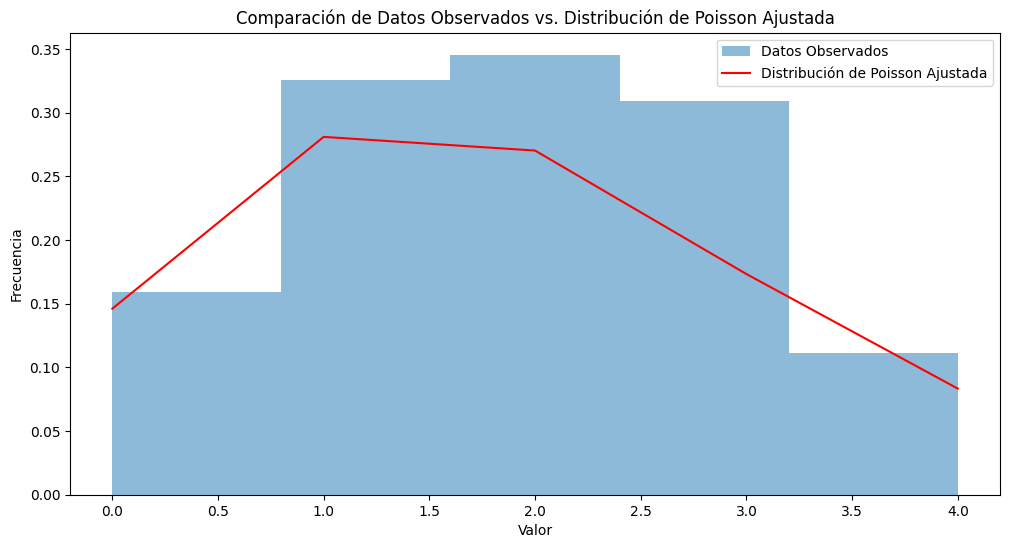

In [692]:
data = df['GPA']
lambda_ = data.mean()  # Parámetro λ de la distribución de Poisson

x = np.arange(min(data), max(data) + 1)  # Valores posibles
expected = poisson.pmf(x, lambda_)  # Frecuencias esperadas

# Visualizar los datos observados y los esperados
plt.figure(figsize=(12, 6))
plt.hist(data, bins=5, density=True, alpha=0.5, label='Datos Observados')
plt.plot(x, expected, color='red', label='Distribución de Poisson Ajustada')
plt.title('Comparación de Datos Observados vs. Distribución de Poisson Ajustada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()